# Adaptive Linear Neuron (ADALINE)

### Download Iris dataset
Follow the link and download the Iris dataset:  
http://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
class Adaline:

    def __init__(self, init='mini-batch', batches=1, alpha=0.0001, epsilon=0.1, max_iter=300):
        self.init = init
        self.batches = batches
        self.alpha = alpha
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.intercept_ = None
        self.coef_ = None
        self.iter = None

    def fit(self, X, y):
        X = np.array(X)
        y = y.reshape(-1, 1)
        self.intercept_ = np.random.normal(loc=0, scale=0.01)
        self.coef_ = np.random.normal(loc=0, scale=0.01, size=(len(X.T), 1))
        self.iter = 0

        if self.init == 'mini-batch':
            self._mini_batch(X, y)
        else:
            self._batch(X, y)
                
        return self

    def _create_batches(self, X, y):
        n = self.batches
        Xy = list(zip(X, y))
        np.random.shuffle(Xy)
        return [Xy[i * n:(i + 1) * n] for i in range((len(Xy) + n - 1) // n )]
    
    def _mini_batch(self, X, y):
        batches = self._create_batches(X, y)
        
        while True:
            self.iter += 1
            if self.iter > self.max_iter:
                break
                
            for batch in batches:
                X, y = zip(*batch)
                X, y = np.array(X), np.array(y)
                
                e = np.ones(len(X))
                z = self._z(X)
                y_cap = self._phi(z)
            
                delta_b = -self.alpha * -e.dot(y - y_cap)
                delta_w = -self.alpha * -X.T.dot(y - y_cap)
                self.intercept_ += delta_b
                self.coef_ += delta_w
    
    def _batch(self, X, y):
        while True:
            self.iter += 1
            if self.iter > self.max_iter:
                break

            e = np.ones(len(X))
            z = self._z(X)
            y_cap = self._phi(z)
            
            delta_b = -self.alpha * -e.dot(y - y_cap)
            delta_w = -self.alpha * -X.T.dot(y - y_cap)
            self.intercept_ += delta_b
            self.coef_ += delta_w
            
            if (delta_b ** 2) + (delta_w ** 2).sum() < self.epsilon:
                break
    
    # weighted input function
    def _z(self, X):
        return X.dot(self.coef_) + self.intercept_
    
    # activation functions
    def _phi(self, z):
        return z

    # quantizer
    def _q(self, a):
        return np.where(a < 0, -1, 1).reshape(1, -1)[0]
    
    def predict(self, X):
        z = self._z(X)
        y_cap = self._phi(z)
        return self._q(y_cap)
    
    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

## Import

In [3]:
X = pd.read_csv('datasets/iris.data.csv')
X = X[X['class'].isin(['Iris-setosa', 'Iris-versicolor'])]
X['class'] = np.where(X['class'] == 'Iris-setosa', -1, 1)

In [4]:
x_fields = ['sepal length', 'petal width']

## Without standardisation

### Slicing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X[x_fields], np.array(X['class']), test_size=0.2)

### Fitting

In [6]:
model = Adaline(alpha=0.0005, epsilon=0.0001).fit(X_train, y_train)

### Performance

In [7]:
print('total iterations', model.iter)
print('train set accuracy', model.score(X_train, y_train))
print('test set accuracy', model.score(X_test, y_test))

total iterations 301
train set accuracy 1.0
test set accuracy 1.0


### Scatterplot

#### train set

In [8]:
x=np.array(X_train).T[0]
y=np.array(X_train).T[1]

In [9]:
hue=np.where(model.predict(X_train) == -1, 'Iris-setosa', 'Iris-versicolor')

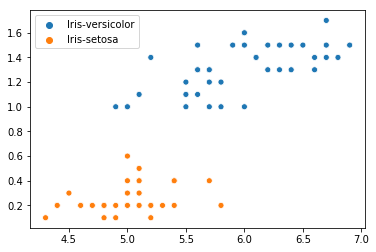

In [10]:
sns.scatterplot(x=x, y=y, hue=hue)

#### test set

In [11]:
x=np.array(X_test).T[0]
y=np.array(X_test).T[1]

In [12]:
hue=np.where(model.predict(X_test) == -1, 'Iris-setosa', 'Iris-versicolor')

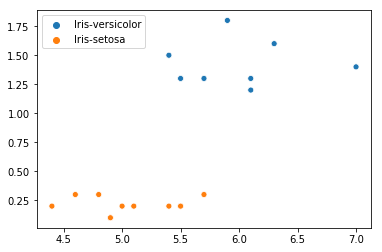

In [13]:
sns.scatterplot(x=x, y=y, hue=hue)

## With standardisation

### Preprocessing

In [14]:
X[x_fields] = StandardScaler().fit_transform(X[x_fields])

### Slicing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X[x_fields], np.array(X['class']), test_size=0.2)

### Fitting

In [16]:
model = Adaline(alpha=0.01, epsilon=0.01).fit(X_train, y_train)

### Performance

In [17]:
print('total iterations', model.iter)
print('train set accuracy', model.score(X_train, y_train))
print('test set accuracy', model.score(X_test, y_test))

total iterations 301
train set accuracy 1.0
test set accuracy 1.0


### Scatterplot

#### train set

In [18]:
x=np.array(X_train).T[0]
y=np.array(X_train).T[1]

In [19]:
hue=np.where(model.predict(X_train) == -1, 'Iris-setosa', 'Iris-versicolor')

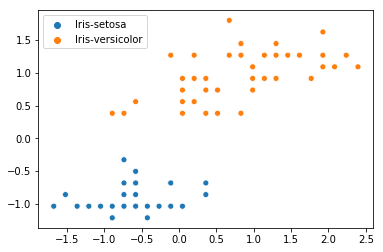

In [20]:
sns.scatterplot(x=x, y=y, hue=hue)

#### test set

In [21]:
x=np.array(X_test).T[0]
y=np.array(X_test).T[1]

In [22]:
hue=np.where(model.predict(X_test) == -1, 'Iris-setosa', 'Iris-versicolor')

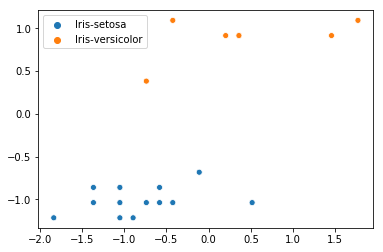

In [23]:
sns.scatterplot(x=x, y=y, hue=hue)

## Linearly inseparable classes

In [24]:
X = pd.read_csv('datasets/iris.data.csv')
X = X[X['class'].isin(['Iris-virginica', 'Iris-versicolor'])]
X['class'] = np.where(X['class'] == 'Iris-virginica', -1, 1)

In [25]:
x_fields = ['sepal length', 'sepal width']

### Preprocessing

In [26]:
X[x_fields] = StandardScaler().fit_transform(X[x_fields])

### Slicing

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X[x_fields], np.array(X['class']), test_size=0.2)

### Fitting

In [28]:
model = Adaline(alpha=0.01, epsilon=0.01).fit(X_train, y_train)

### Performance

In [29]:
print('total iterations', model.iter)
print('train set accuracy', accuracy_score(y_train, model.predict(X_train)))
print('test set accuracy', accuracy_score(y_test, model.predict(X_test)))

total iterations 301
train set accuracy 0.775
test set accuracy 0.65


### Scatterplot predicted

#### train set

In [30]:
x=np.array(X_train).T[0]
y=np.array(X_train).T[1]

In [31]:
hue=np.where(model.predict(X_train) == -1, 'Iris-virginica', 'Iris-versicolor')

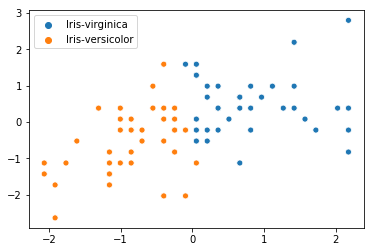

In [32]:
sns.scatterplot(x=x, y=y, hue=hue)

#### test set

In [33]:
x=np.array(X_test).T[0]
y=np.array(X_test).T[1]

In [34]:
hue=np.where(model.predict(X_test) == -1, 'Iris-virginica', 'Iris-versicolor')

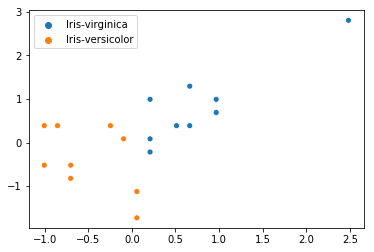

In [35]:
sns.scatterplot(x=x, y=y, hue=hue)

### Scatterplot actual

#### train set

In [36]:
x=np.array(X_train).T[0]
y=np.array(X_train).T[1]

In [37]:
hue=np.where(y_train == -1, 'Iris-virginica', 'Iris-versicolor')

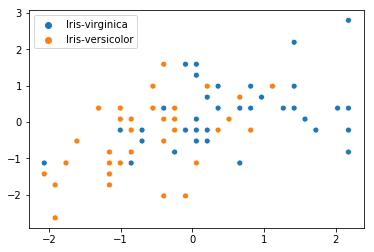

In [38]:
sns.scatterplot(x=x, y=y, hue=hue)

#### test set

In [39]:
x=np.array(X_test).T[0]
y=np.array(X_test).T[1]

In [40]:
hue=np.where(y_test == -1, 'Iris-virginica', 'Iris-versicolor')

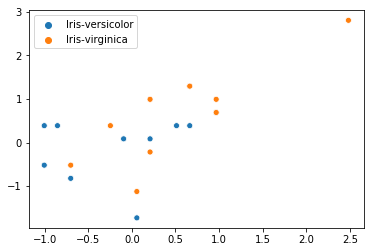

In [41]:
sns.scatterplot(x=x, y=y, hue=hue)